<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-13 09:27:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  56.4MB/s    in 4.8s    

2025-09-13 09:27:51 (41.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


Valid values after cleaning: 27539


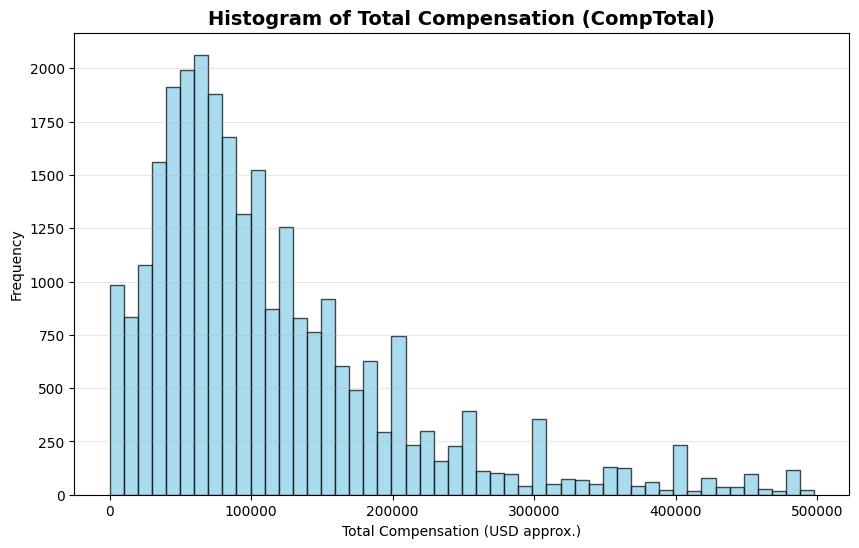

In [10]:

# Fetch CompTotal
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
AND CompTotal != ''
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Remove commas, symbols, and convert to numeric
df["CompTotal"] = df["CompTotal"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

# Drop NaN
df = df.dropna()

# Filter out extreme outliers for readability (e.g., > 500k)
df = df[df["CompTotal"] < 500000]

print(f"Valid values after cleaning: {len(df)}")

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df["CompTotal"], bins=50, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Total Compensation (CompTotal)", fontsize=14, fontweight="bold")
plt.xlabel("Total Compensation (USD approx.)")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.3)
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


Valid experience values: 51610


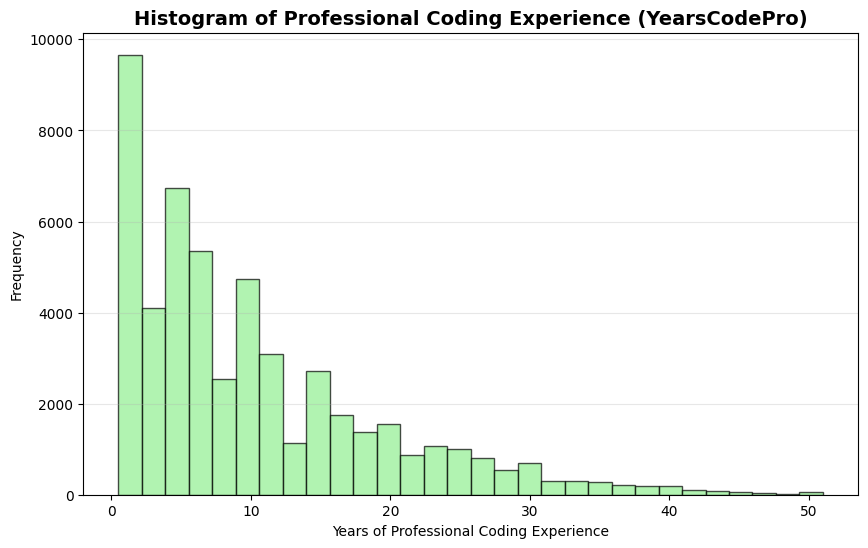

In [11]:
## Write your code here
# Connect again
conn = sqlite3.connect("survey-data.sqlite")

# Fetch YearsCodePro
query = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
AND YearsCodePro != ''
"""
df_exp = pd.read_sql_query(query, conn)
conn.close()

# Clean and convert
def convert_years(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    else:
        try:
            return float(val)
        except:
            return None

df_exp["YearsCodePro"] = df_exp["YearsCodePro"].apply(convert_years)
df_exp = df_exp.dropna()

print(f"Valid experience values: {len(df_exp)}")

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_exp["YearsCodePro"], bins=30, color="lightgreen", edgecolor="black", alpha=0.7)
plt.title("Histogram of Professional Coding Experience (YearsCodePro)", fontsize=14, fontweight="bold")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.3)
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


['18-24 years old' '25-34 years old' '35-44 years old' '45-54 years old'
 '55-64 years old' '65 years or older' 'Under 18 years old'
 'Prefer not to say']


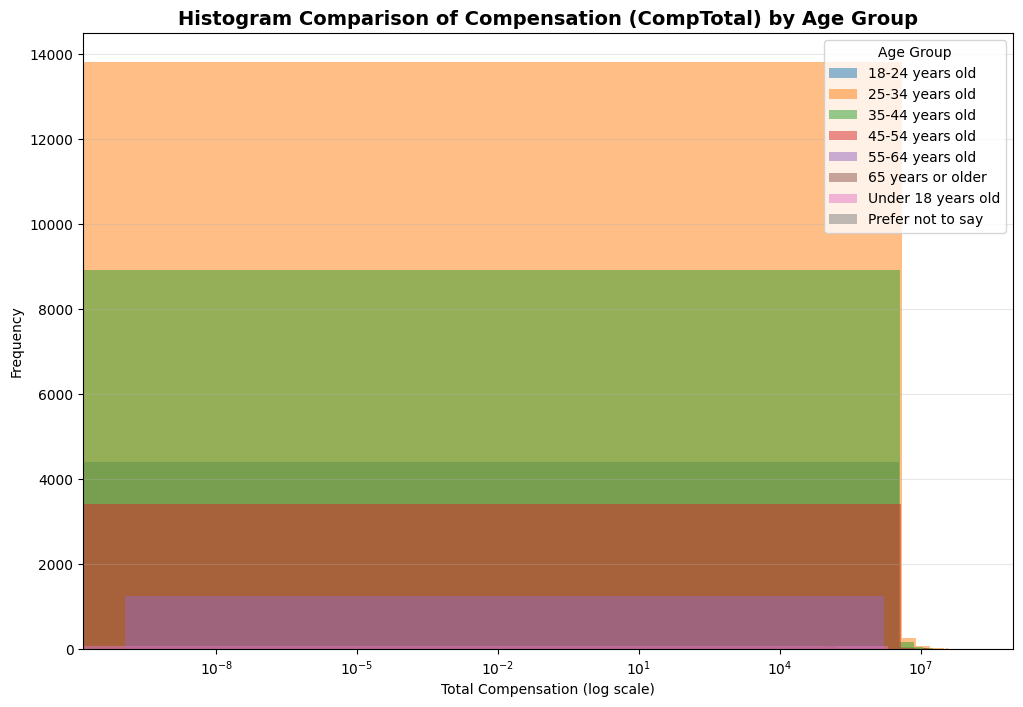

In [13]:
## Write your code here
# Connect to DB
conn = sqlite3.connect("survey-data.sqlite")

# Query age and compensation
query = """
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
AND Age IS NOT NULL
AND CompTotal != ''
"""
df_age_comp = pd.read_sql_query(query, conn)
conn.close()

# Convert CompTotal to numeric
df_age_comp["CompTotal"] = pd.to_numeric(df_age_comp["CompTotal"], errors="coerce")
df_age_comp = df_age_comp.dropna(subset=["CompTotal"])

# Remove extreme outliers (optional: top 1%)
df_age_comp = df_age_comp[df_age_comp["CompTotal"] < df_age_comp["CompTotal"].quantile(0.99)]

print(df_age_comp["Age"].unique())  # Check available age groups

# Histogram comparison with log scale
plt.figure(figsize=(12,8))

age_groups = df_age_comp["Age"].unique()
for age in age_groups:
    subset = df_age_comp[df_age_comp["Age"] == age]
    plt.hist(subset["CompTotal"], bins=30, alpha=0.5, label=age)

plt.xscale("log")  # log scale for compensation
plt.title("Histogram Comparison of Compensation (CompTotal) by Age Group", fontsize=14, fontweight="bold")
plt.xlabel("Total Compensation (log scale)")
plt.ylabel("Frequency")
plt.legend(title="Age Group")
plt.grid(axis="y", alpha=0.3)
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


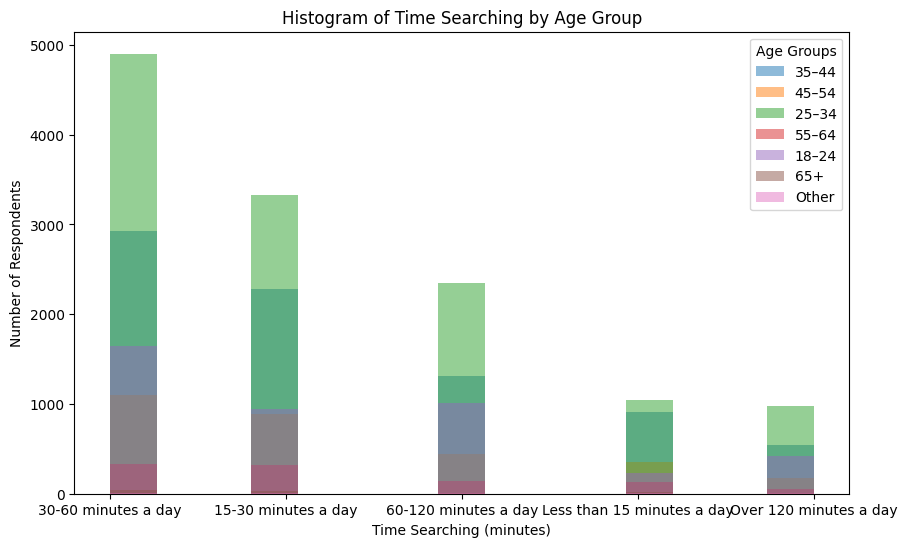

In [14]:
## Write your code here

# --- Connect to database ---
conn = sqlite3.connect('survey-data.sqlite')

# --- Fetch relevant data ---
query = """
SELECT TimeSearching, Age 
FROM main
WHERE TimeSearching IS NOT NULL 
  AND Age IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Convert Age to categorical buckets (example: 18–24, 25–34, etc.) ---
def bucket_age(age):
    if "18" in age or "24" in age: return "18–24"
    elif "25" in age or "34" in age: return "25–34"
    elif "35" in age or "44" in age: return "35–44"
    elif "45" in age or "54" in age: return "45–54"
    elif "55" in age or "64" in age: return "55–64"
    elif "65" in age: return "65+"
    else: return "Other"

df["AgeGroup"] = df["Age"].apply(bucket_age)

# --- Plot histograms ---
plt.figure(figsize=(10,6))
for group in df["AgeGroup"].unique():
    subset = df[df["AgeGroup"] == group]["TimeSearching"]
    plt.hist(subset, bins=15, alpha=0.5, label=group)

plt.xlabel("Time Searching (minutes)")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Time Searching by Age Group")
plt.legend(title="Age Groups")
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


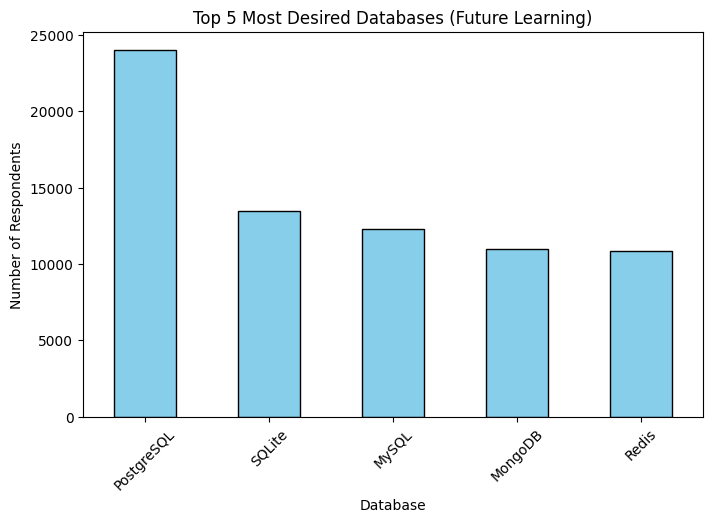

In [15]:
## Write your code here

# --- Connect to database ---
conn = sqlite3.connect('survey-data.sqlite')

# --- Fetch relevant data ---
query = """
SELECT DatabaseWantToWorkWith 
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Split multiple entries (if respondent selected more than one DB) ---
all_dbs = df["DatabaseWantToWorkWith"].str.split(";").explode().str.strip()

# --- Count frequencies ---
db_counts = all_dbs.value_counts().head(5)

# --- Plot histogram (bar chart of counts) ---
plt.figure(figsize=(8,5))
db_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Top 5 Most Desired Databases (Future Learning)")
plt.xticks(rotation=45)
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


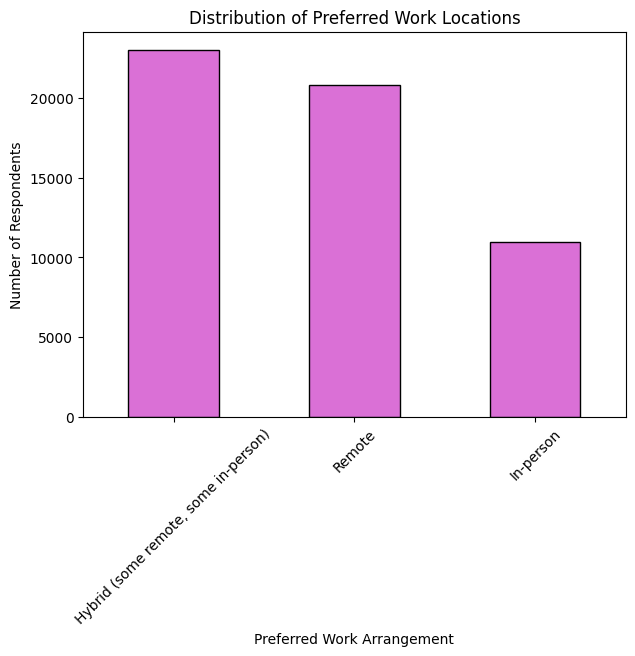

In [16]:
## Write your code here

# --- Connect to database ---
conn = sqlite3.connect('survey-data.sqlite')

# --- Fetch relevant data ---
query = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Count responses ---
remote_counts = df["RemoteWork"].value_counts()

# --- Plot histogram (categorical -> bar chart) ---
plt.figure(figsize=(7,5))
remote_counts.plot(kind="bar", color="orchid", edgecolor="black")

plt.xlabel("Preferred Work Arrangement")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Preferred Work Locations")
plt.xticks(rotation=45)
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


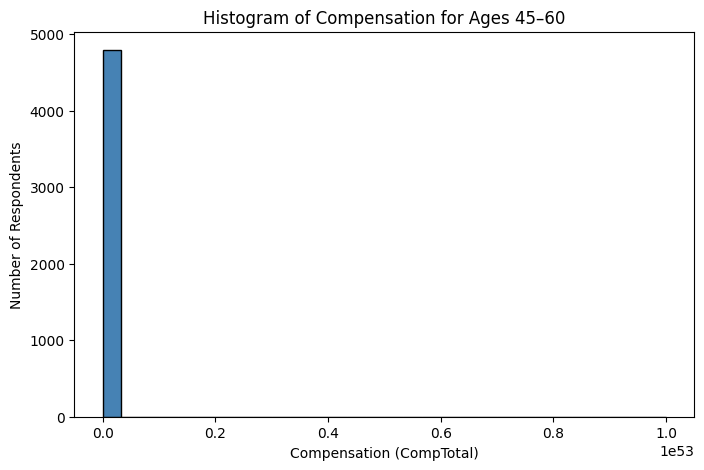

In [17]:
## Write your code here

# --- Connect to database ---
conn = sqlite3.connect('survey-data.sqlite')

# --- Fetch relevant data ---
query = """
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
  AND Age IS NOT NULL
"""
df = pd.read_sql(query, conn)

# --- Filter ages 45 to 60 ---
age_filter = df["Age"].isin(["45-54 years old", "55-64 years old"])
df_midcareer = df[age_filter].copy()

# --- Clean numeric values (CompTotal can be strings sometimes) ---
df_midcareer["CompTotal"] = pd.to_numeric(df_midcareer["CompTotal"], errors="coerce")
df_midcareer = df_midcareer.dropna(subset=["CompTotal"])

# --- Plot histogram ---
plt.figure(figsize=(8,5))
plt.hist(df_midcareer["CompTotal"], bins=30, color="steelblue", edgecolor="black")

plt.xlabel("Compensation (CompTotal)")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Compensation for Ages 45–60")
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [ ]:
## Write your code here

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
